# 차원축소(PCA)

속성이 아주 많을 때, 필요없는 속성이 있을 때, 필요있는, 중요한 데이터 속성을 추출하여 분석 시 사용한다. 


차원축소를 하는 알고리즘은 많이 있으나 가장 대표적인 것이 PCA(주성분 분석)

In [3]:
from sklearn.datasets import fetch_20newsgroups
import matplotlib as mpl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from pylab import *
import nltk
import warnings
warnings.filterwarnings("ignore")

stop_words = stopwords.words('english')

In [4]:
stop_words 

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [5]:
# 표제어 추출
lemmatizer = WordNetLemmatizer()

In [6]:
categories = ['misc.forsale', 'sci.electronics', 'talk.religion.misc']
news_data = fetch_20newsgroups(subset='train', shuffle=True, random_state=42, categories=categories, download_if_missing=True)

In [10]:
news_data_df = pd.DataFrame({'text' : news_data['data'], 'category' : news_data.target})
news_data_df.head()

,text,category
0,From: Steve@Busop.cit.wayne.edu (Steve Teolis)...,0
1,From: jks2x@holmes.acc.Virginia.EDU (Jason K. ...,0
2,From: wayne@uva386.schools.virginia.edu (Tony ...,1
3,From: lihan@ccwf.cc.utexas.edu (Bruce G. Bostw...,1
4,From: myoakam@cis.ohio-state.edu (micah r yoak...,0


In [12]:
news_data_df['cleaned_text'] = news_data_df['text'].apply(lambda x : ' '.join([lemmatizer.lemmatize(word.lower()) for word in word_tokenize(re.sub(r'([^\s\w]|_)+', " ", str(x))) if word.lower() not in stop_words]))

In [13]:
news_data_df

,text,category,cleaned_text
0,From: Steve@Busop.cit.wayne.edu (Steve Teolis)...,0,steve busop cit wayne edu steve teolis subject...
1,From: jks2x@holmes.acc.Virginia.EDU (Jason K. ...,0,jks2x holmes acc virginia edu jason k schechne...
2,From: wayne@uva386.schools.virginia.edu (Tony ...,1,wayne uva386 school virginia edu tony wayne su...
3,From: lihan@ccwf.cc.utexas.edu (Bruce G. Bostw...,1,lihan ccwf cc utexas edu bruce g bostwick subj...
4,From: myoakam@cis.ohio-state.edu (micah r yoak...,0,myoakam ci ohio state edu micah r yoakam subje...
...,...,...,...
1548,From: psyrobtw@ubvmsb.cc.buffalo.edu (Robert W...,2,psyrobtw ubvmsb cc buffalo edu robert wei subj...
1549,From: brian@lpl.arizona.edu (Brian Ceccarelli ...,2,brian lpl arizona edu brian ceccarelli 602 621...
1550,From: bmaraldo@watserv1.uwaterloo.ca (Commande...,0,bmaraldo watserv1 uwaterloo ca commander brett...
1551,From: wtm@uhura.neoucom.edu (Bill Mayhew)\nSub...,1,wtm uhura neoucom edu bill mayhew subject adco...


In [16]:
# tfidf_model 
count_model = CountVectorizer(max_features=200) # 최대 단어 선정 (높은 빈도수 중 200개까지 추출)
count_df = pd.DataFrame(count_model.fit_transform(news_data_df['cleaned_text']).todense())
count_df.columns = sorted(count_model.vocabulary_) # 단어 사전 자동 생성
print(len(count_df))
count_df.head()

1553


,00,10,100,12,14,15,16,20,25,30,...,well,wire,wiring,without,word,work,world,would,writes,year
0,3,0,0,0,0,1,1,1,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
4,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
from sklearn.decomposition import PCA # PCA라는 라이브러리 불러오기 # 차원을 2개로 하겠다.
# 그래프를 그릴 때 2차원 그래프로 만들기 위해서 2개로 한다.

In [21]:
pca = PCA(2) # we shall reduce the dimensionality to 2

In [22]:
pca.fit(count_df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [23]:
reduced_tfidf = pca.transform(count_df)
reduced_tfidf # 차원이 2개라고 했으니, column이 2개.

array([[-0.5378928 ,  2.74103154],
       [-1.08289857, -0.47709063],
       [-1.31351854, -0.63871089],
       ...,
       [-0.93129704, -0.57650812],
       [-0.71693102, -0.67322127],
       [-1.30475492, -0.63710253]])

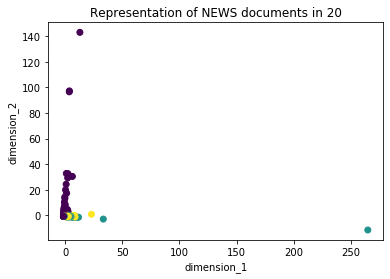

In [25]:
plt.scatter(reduced_tfidf[:, 0], reduced_tfidf[:, 1], c = news_data_df['category'], cmap='viridis')
plt.xlabel('dimension_1')
plt.ylabel("dimension_2")
plt.title("Representation of NEWS documents in 20")
plt.show()